In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ML models 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

In [3]:
# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
lp_hc_train = pd.read_csv("C:\\Users\\dakha\\Downloads\\train_ctrUa4K.csv")

In [7]:
lp_test = pd.read_csv("C:\\Users\\dakha\\Downloads\\test_lAUu6dG.csv")

In [8]:
lp_hc.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [9]:
print(f"training set (row, col): {lp_hc.shape}\n\ntesting set (row, col): {lp_test.shape}")

training set (row, col): (614, 13)

testing set (row, col): (367, 12)


In [12]:
lp_hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
lp_hc.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [24]:
lp_hc.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [27]:
lp_test.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male     Yes          0      Graduate            No             5720   
1   Male     Yes          1      Graduate            No             3076   
2   Male     Yes          2      Graduate            No             5000   
3   Male     Yes          2      Graduate            No             2340   
4   Male      No          0  Not Graduate            No             3276   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0       110.0             360.0             1.0   
1               1500       126.0             360.0             1.0   
2               1800       208.0             360.0             1.0   
3               2546       100.0             360.0             NaN   
4                  0        78.0             360.0             1.0   

  Property_Area  
0         Urban  
1         Urban  
2         Urban  
3         Urban  
4         Urban

In [28]:
#find missing valuesin descending values
lp_hc.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
#fill the missing values

print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


Before filling missing values

 ################################################## 



In [31]:
for col in null_cols:
    print(f"{col}:\n{lp_hc[col].value_counts()}\n","-"*50)
    lp_hc[col] = lp_hc[col].fillna(
    lp_hc[col].dropna().mode().values[0] )   

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype: int64
 --------------------------------------------------
Married:
Yes    398
No   

In [32]:
lp_hc.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{lp_hc[col].value_counts()}\n","-"*50)

After filling missing values

 ################################################## 


Credit_History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------

Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------

LoanAmount:
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------

Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------

Loan_Amount_Term:
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------

Gender:
Male      502
Female    112
Name: Gender, 

In [34]:
#list of numeric values
numeric_values = lp_hc.select_dtypes('number').columns.to_list()
#list of categorical values
categorical_values = lp_hc.select_dtypes('object').columns.to_list()

In [36]:
#numeric df
loan_num =  lp_hc[numeric_values]
#categoric df
loan_cat = lp_hc[categorical_values]

In [37]:
print(lp_hc[categorical_values[-1]].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


C:\Users\dakha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


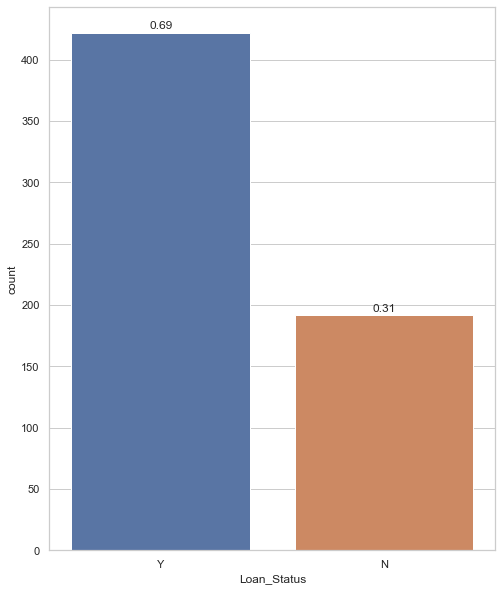

In [38]:
#print(i)
total = float(len(lp_hc[categorical_values[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(lp_hc[categorical_values[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

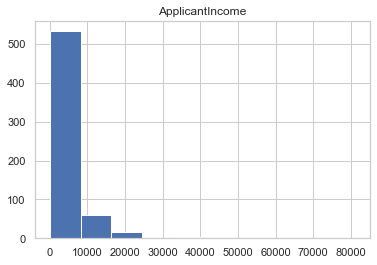

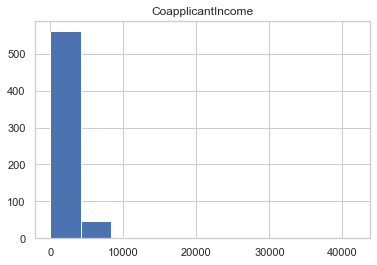

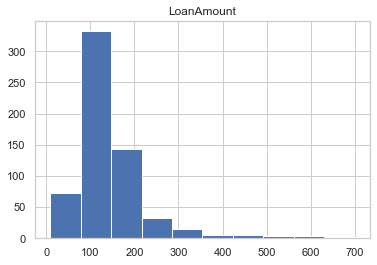

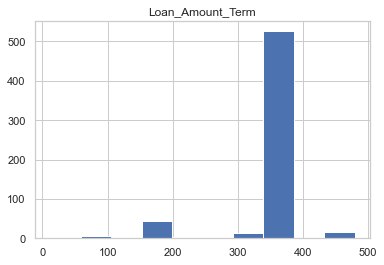

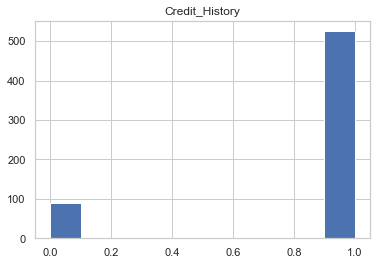

In [39]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

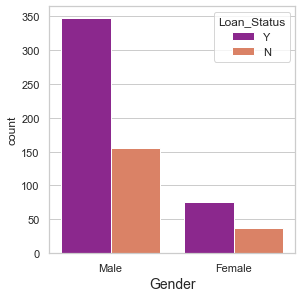

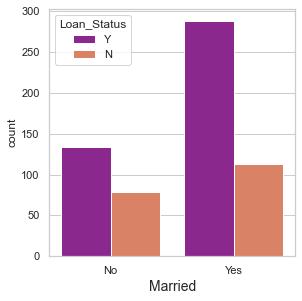

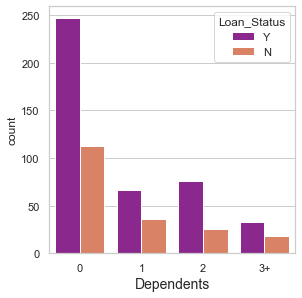

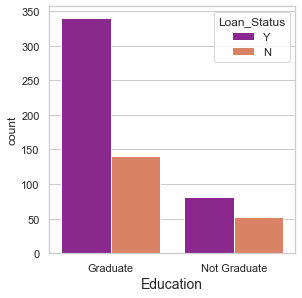

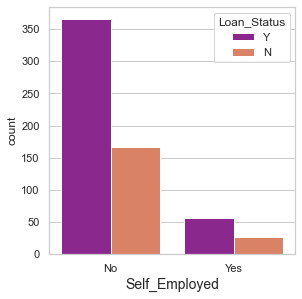

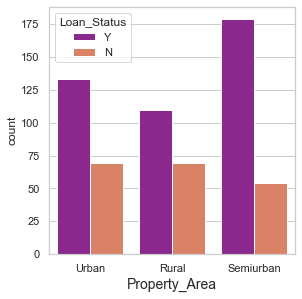

In [42]:
# split of categorical data 
for i in categorical_values[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=lp_hc ,palette='plasma')
    plt.xlabel(i, fontsize=14)

In [43]:
# converting categorical data into numeric data
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [44]:
# adding the new numeric values from the to_numeric variable to both datasets
lp_hc = lp_hc.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
lp_test = lp_test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


In [45]:
# converting the Dependents column
Dependents_ = pd.to_numeric(lp_hc.Dependents)
Dependents__ = pd.to_numeric(lp_test.Dependents)

In [46]:
# dropping the previous Dependents column
lp_hc.drop(['Dependents'], axis = 1, inplace = True)
lp_test.drop(['Dependents'], axis = 1, inplace = True)


In [47]:
# concatination of the new Dependents column with both datasets
lp_hc = pd.concat([lp_hc, Dependents_], axis = 1)
lp_test = pd.concat([lp_test, Dependents__], axis = 1)

In [48]:
# checking the our manipulated dataset for validation
print(f"training set (row, col): {lp_hc.shape}\n\ntesting set (row, col): {lp_test.shape}\n")
print(lp_hc.info(), "\n\n", lp_test.info())

training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 column

<AxesSubplot:>

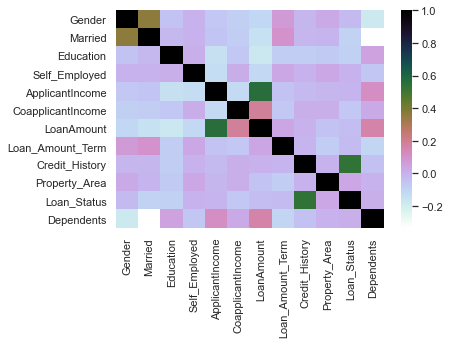

In [49]:
#plotting the correlation matrix
sns.heatmap(lp_hc.corr() ,cmap='cubehelix_r')

In [50]:
#correlation table
corr = lp_hc.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.54). Therefore our target value is highly dependant on this column.

# ML models

In [52]:
y = lp_hc['Loan_Status']
X = lp_hc.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

The first model we are using is Decision Tree

In [53]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)


In [54]:
#  prediction Summary by species
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.44      0.53      0.48        51
           1       0.80      0.74      0.77       134

    accuracy                           0.68       185
   macro avg       0.62      0.63      0.62       185
weighted avg       0.70      0.68      0.69       185



In [55]:
# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

68.11% Accurate


In [56]:
# Result is 
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Dection Tree.csv")

# Random Forest

In [57]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

In [58]:
#  prediction Summary by species
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53        51
           1       0.81      0.93      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.68      0.70       185
weighted avg       0.78      0.79      0.77       185



In [59]:
# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

78.92% Accurate


In [60]:
# result is
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv") 

# Logistic Regression

In [61]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

C:\Users\dakha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
#  prediction Summary by species
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [63]:
# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

accuracy is 0.8324324324324325


In [64]:
# Result is
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")   

# Conclusion

### 1. The Logistic Regression algorithm is the most accurate: approximately 83%.
### 2. Credit_History is a very important variable because of its high correlation with Loan_Status there for    showing high Dependancy for the latter.

In [66]:
score = [DT_SC,RF_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

n_neighbors     Score
2  Logistic Regression  0.832432
1        Random Forest  0.789189
0        Decision Tree  0.681081